In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Função para ler o arquivo e criar o DataFrame
def criar_dataset(arquivo_txt):
    # Lista para armazenar as linhas do dataset
    dados = []

    # Abrir o arquivo e ler linha por linha
    with open(arquivo_txt, 'r') as arquivo:
        for linha in arquivo:
            # Remover espaços em branco e quebrar a linha em itens
            itens = linha.strip().split()

            # Convertendo cada item para o tipo correspondente
            algoritmo = int(itens[0])
            numCentros = int(itens[1])
            p = int(itens[2])
            instancia = str(itens[3])
            tempoExecucao = float(itens[4])
            raio = float(itens[5])
            silhueta = float(itens[6])
            indiceRand = float(itens[7])
            percentRaio = float(itens[8])

            # Adicionando a linha de dados à lista
            dados.append([algoritmo, numCentros, p, instancia, tempoExecucao, raio, silhueta, indiceRand, percentRaio])

    # Criar o DataFrame a partir da lista de dados
    colunas = ['algoritmo', 'numCentros', 'p', 'instancia', 'tempoExecucao', 'raio', 'silhueta', 'indiceRand', 'percentRaio']
    df = pd.DataFrame(dados, columns=colunas)

    return df

# Exemplo de uso
arquivo_txt = 'resultados.txt'  # Caminho para o arquivo .txt
df = criar_dataset(arquivo_txt)
rename_dict = {
    '.\\annealing.txt': 'real1.txt',
    '.\\banknote_authentication.txt': 'real2.txt',
    '.\\estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.txt': 'real3.txt',
    '.\\hepatitis_c_virus_hcv_for_egyptian_patients.txt': 'real4.txt',
    '.\\rice_cammeo_and_osmancik.txt': 'real5.txt',
    '.\\statlog_german_credit_data.txt': 'real6.txt',
    '.\\statlog_landsat_satellite.txt': 'real7.txt',
    '.\\waveform_database_generator_version_1.txt': 'real8.txt',
    '.\\wine_quality.txt': 'real9.txt',
    '.\\yeast.txt': 'real10.txt'
}

# Renomeando os valores da coluna 'instancia'
df['instancia'] = df['instancia'].replace(rename_dict)

# Verifique se as mudanças foram aplicadas
# df.head()


dfGuloso = df.query('algoritmo == 1')
dfAproxRaio = df.query('algoritmo == 2')
dfKMeans = df.query('algoritmo == 3')

#resultados = df.groupby(['algoritmo','instancia', 'p', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])
#resultados.to_csv('resultados.csv', index=True)

In [ ]:
dfGuloso.columns

Index(['algoritmo', 'numCentros', 'p', 'instancia', 'tempoExecucao', 'raio',
       'silhueta', 'indiceRand', 'percentRaio'],
      dtype='object')

In [ ]:
# Agrupando os dados por 'numCentros' e 'p' e calculando as estatísticas desejadas
dfGulosoP1 = dfGuloso.query('p == 1')
dfGulosoP2 = dfGuloso.query('p == 2')
resultadosGuloso1 = dfGulosoP1.groupby('instancia')[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])
resultadosGuloso2 = dfGulosoP2.groupby('instancia')[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])

tempoExecucao                   raio              silhueta  \
                         mean       std         mean         std      mean   
instancia                                                                    
.\df_0.txt           0.018363  0.001769     2.157497    0.218327  0.366790   
.\df_1.txt           0.018800  0.002058     2.314687    0.176563  0.440587   
.\df_2.txt           0.028573  0.001856     9.076587    0.939334  0.382807   
.\df_3.txt           0.027930  0.001603     3.304883    0.545310  0.511870   
.\df_4.txt           0.027470  0.000512     7.063367    0.545085  0.559927   
.\df_5.txt           0.017867  0.000571     2.247597    0.208693  0.365540   
.\df_6.txt           0.018713  0.002427     2.271270    0.300081  0.433343   
.\df_7.txt           0.029033  0.002406     9.153120    0.808455  0.379920   
.\df_8.txt           0.028090  0.002414     3.506607    0.554037  0.510293   
.\df_9.txt           0.027433  0.000518     6.635887    0.899162  0.650250   
.\pontos_1.txt       0.089797  0.002952     7.277263    1.007668  0.659250   
.\pontos_10.txt      0.092847  0.006531     8.511787    0.841724  0.648480   
.\pontos_2.txt       0.090240  0.002785     9.146667    0.748901  0.783990   
.\pontos_3.txt       0.091053  0.003996     9.259443    1.204734  0.816093   
.\pontos_4.txt       0.090257  0.002507     8.600510    1.163907  0.738310   
.\pontos_5.txt       0.088887  0.002243     8.772760    1.057814  0.664447   
.\pontos_6.txt       0.090633  0.004146     9.467283    0.352232  0.809053   
.\pontos_7.txt       0.093540  0.004923     6.704380    0.806541  0.662200   
.\pontos_8.txt       0.090763  0.006115     9.031030    0.302096  0.683957   
.\pontos_9.txt       0.090600  0.002843     8.292920    0.998445  0.569307   
real1.txt            0.100363  0.003019   221.493400   23.042256  0.794380   
real10.txt           0.512423  0.008388     0.289000    0.015614  0.194700   
real2.txt            0.063923  0.004248    15.733333    1.700575  0.430950   
real3.txt            0.421053  0.006484     4.600000    0.498273  0.448967   
real4.txt            0.124677  0.004766  1952.833333  217.416981  0.523577   
real5.txt            0.295017  0.006422  4719.933333  556.717841  0.429310   
real6.txt            0.042333  0.003053    56.600000    5.875724  0.434680   
real7.txt            1.366300  0.016117    34.033333    2.442206  0.401913   
real8.txt            0.571777  0.013124     4.000000    0.000000  0.443093   
real9.txt            1.661487  0.021739     0.321800    0.015834  0.305057   

                          indiceRand            
                      std       mean       std  
instancia                                       
.\df_0.txt       0.012268   0.000363  0.003277  
.\df_1.txt       0.040622   0.277373  0.085321  
.\df_2.txt       0.020907   0.412523  0.111837  
.\df_3.txt       0.047329   0.606883  0.104353  
.\df_4.txt       0.032728   0.772717  0.077332  
.\df_5.txt       0.013200   0.000693  0.002341  
.\df_6.txt       0.048572   0.269273  0.133929  
.\df_7.txt       0.023143   0.393647  0.129359  
.\df_8.txt       0.045471   0.604440  0.095168  
.\df_9.txt       0.057515   0.863507  0.134447  
.\pontos_1.txt   0.033624   0.791487  0.084836  
.\pontos_10.txt  0.073179   0.854003  0.106778  
.\pontos_2.txt   0.024462   0.950033  0.035331  
.\pontos_3.txt   0.009294   0.992407  0.012881  
.\pontos_4.txt   0.021269   0.950697  0.027994  
.\pontos_5.txt   0.050670   0.854727  0.068350  
.\pontos_6.txt   0.007701   0.993757  0.009869  
.\pontos_7.txt   0.011642   0.713877  0.022078  
.\pontos_8.txt   0.037490   0.864567  0.081516  
.\pontos_9.txt   0.074462   0.749137  0.114991  
real1.txt        0.052345   0.022317  0.003589  
real10.txt       0.037152   0.074613  0.010357  
real2.txt        0.034239   0.122443  0.065587  
real3.txt        0.055534   0.051987  0.012776  
real4.txt        0.019212  -0.000887  0.000430  
real5.txt        0.059606   0.077100  0.091893  
real6.txt        0.0

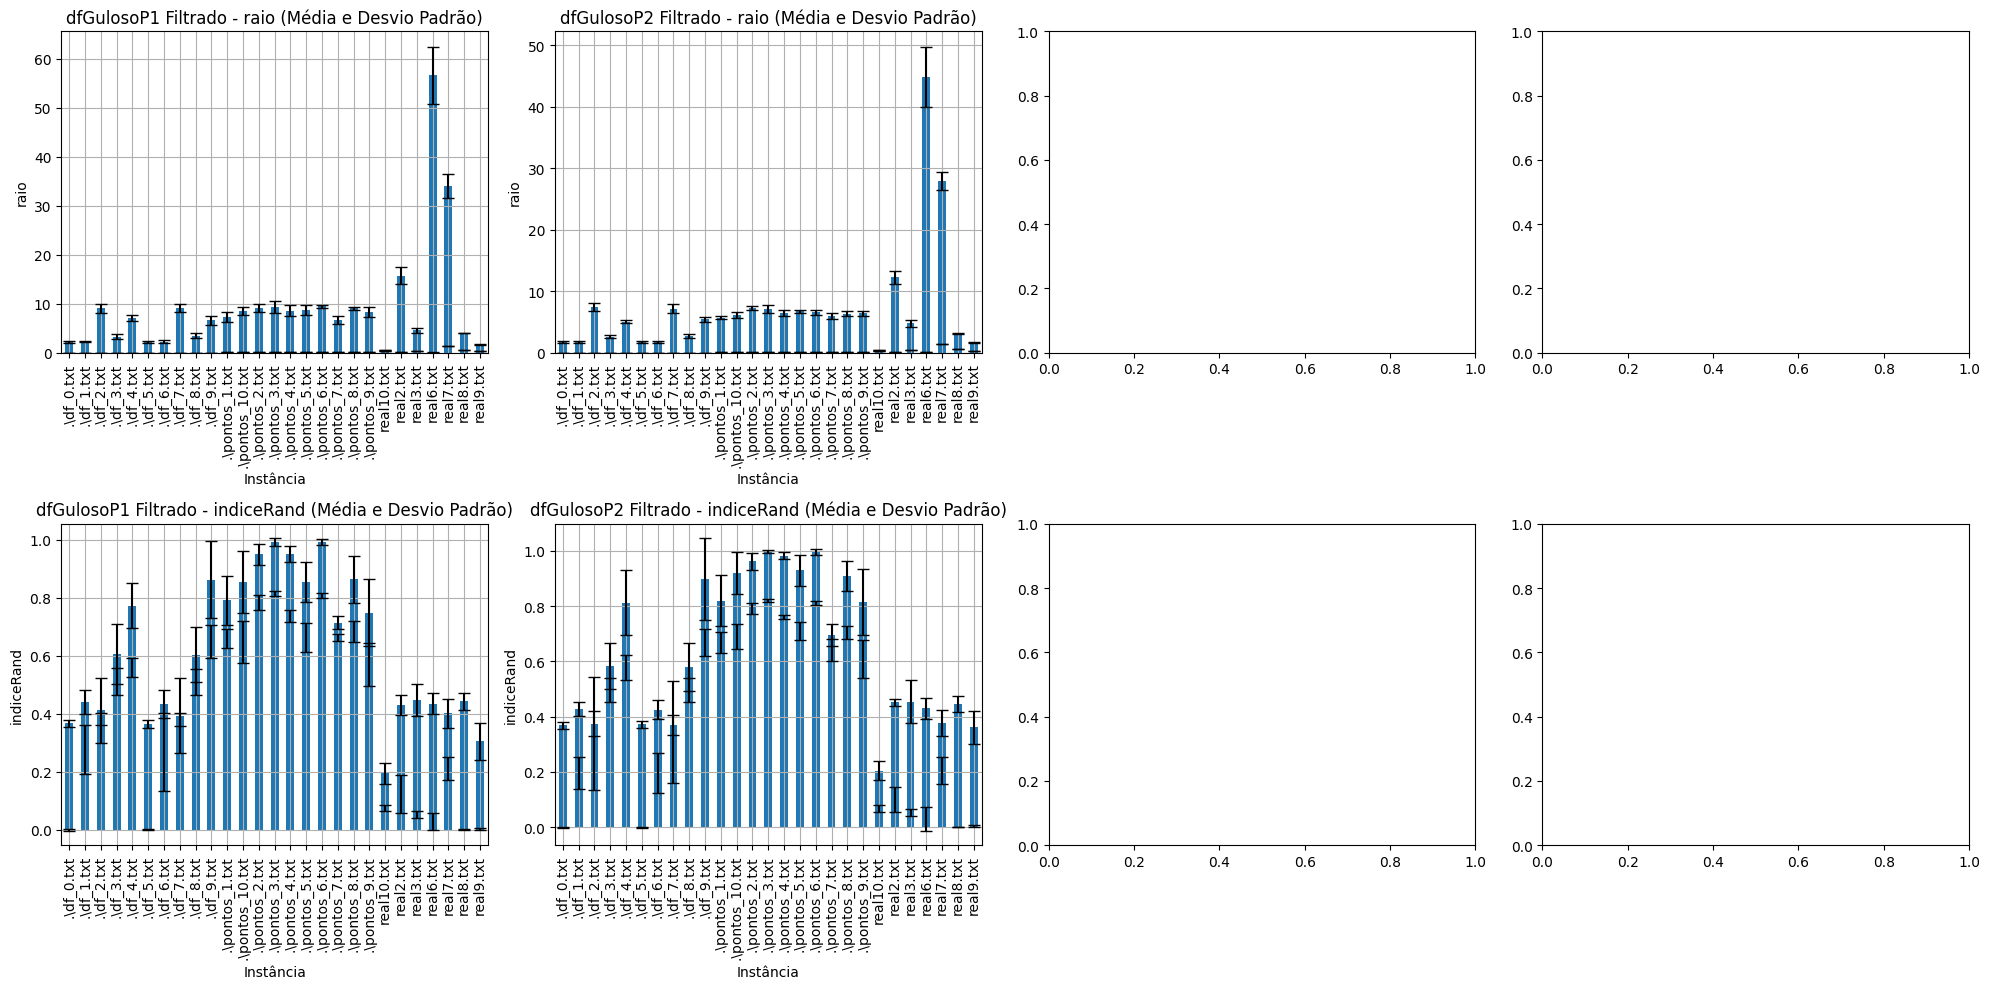

In [43]:
# Lista de instâncias a serem removidas
instancias_remover = ['real1.txt', 'real4.txt', 'real5.txt']

# Removendo as instâncias do DataFrame
resultadosGuloso1_filtered = resultadosGuloso1.drop(index=instancias_remover, errors='ignore')
resultadosGuloso2_filtered = resultadosGuloso2.drop(index=instancias_remover, errors='ignore')

# Função para visualizar os dados filtrados
def plot_filtered_metrics(resultados1, resultados2, title1, title2):
    metrics = ['tempoExecucao', 'raio', 'silhueta', 'indiceRand']

    fig, axs = plt.subplots(2, 4, figsize=(20, 10))

    # Plotando para resultadosGuloso1
    for i, metric in enumerate(metrics):
        ax = axs[i//2, 0]  # Coluna 0 para resultadosGuloso1
        resultados1[metric]['mean'].plot(kind='bar', yerr=resultados1[metric]['std'], ax=ax, capsize=4)
        ax.set_title(f'{title1} - {metric} (Média e Desvio Padrão)')
        ax.set_xlabel('Instância')
        ax.set_ylabel(metric)
        ax.grid(True)

    # Plotando para resultadosGuloso2
    for i, metric in enumerate(metrics):
        ax = axs[i//2, 1]  # Coluna 1 para resultadosGuloso2
        resultados2[metric]['mean'].plot(kind='bar', yerr=resultados2[metric]['std'], ax=ax, capsize=4)
        ax.set_title(f'{title2} - {metric} (Média e Desvio Padrão)')
        ax.set_xlabel('Instância')
        ax.set_ylabel(metric)
        ax.grid(True)

    # Ajustando o layout
    plt.tight_layout()
    plt.show()

# Visualizando os resultados após remover as instâncias
plot_filtered_metrics(resultadosGuloso1_filtered, resultadosGuloso2_filtered, "dfGulosoP1 Filtrado", "dfGulosoP2 Filtrado")


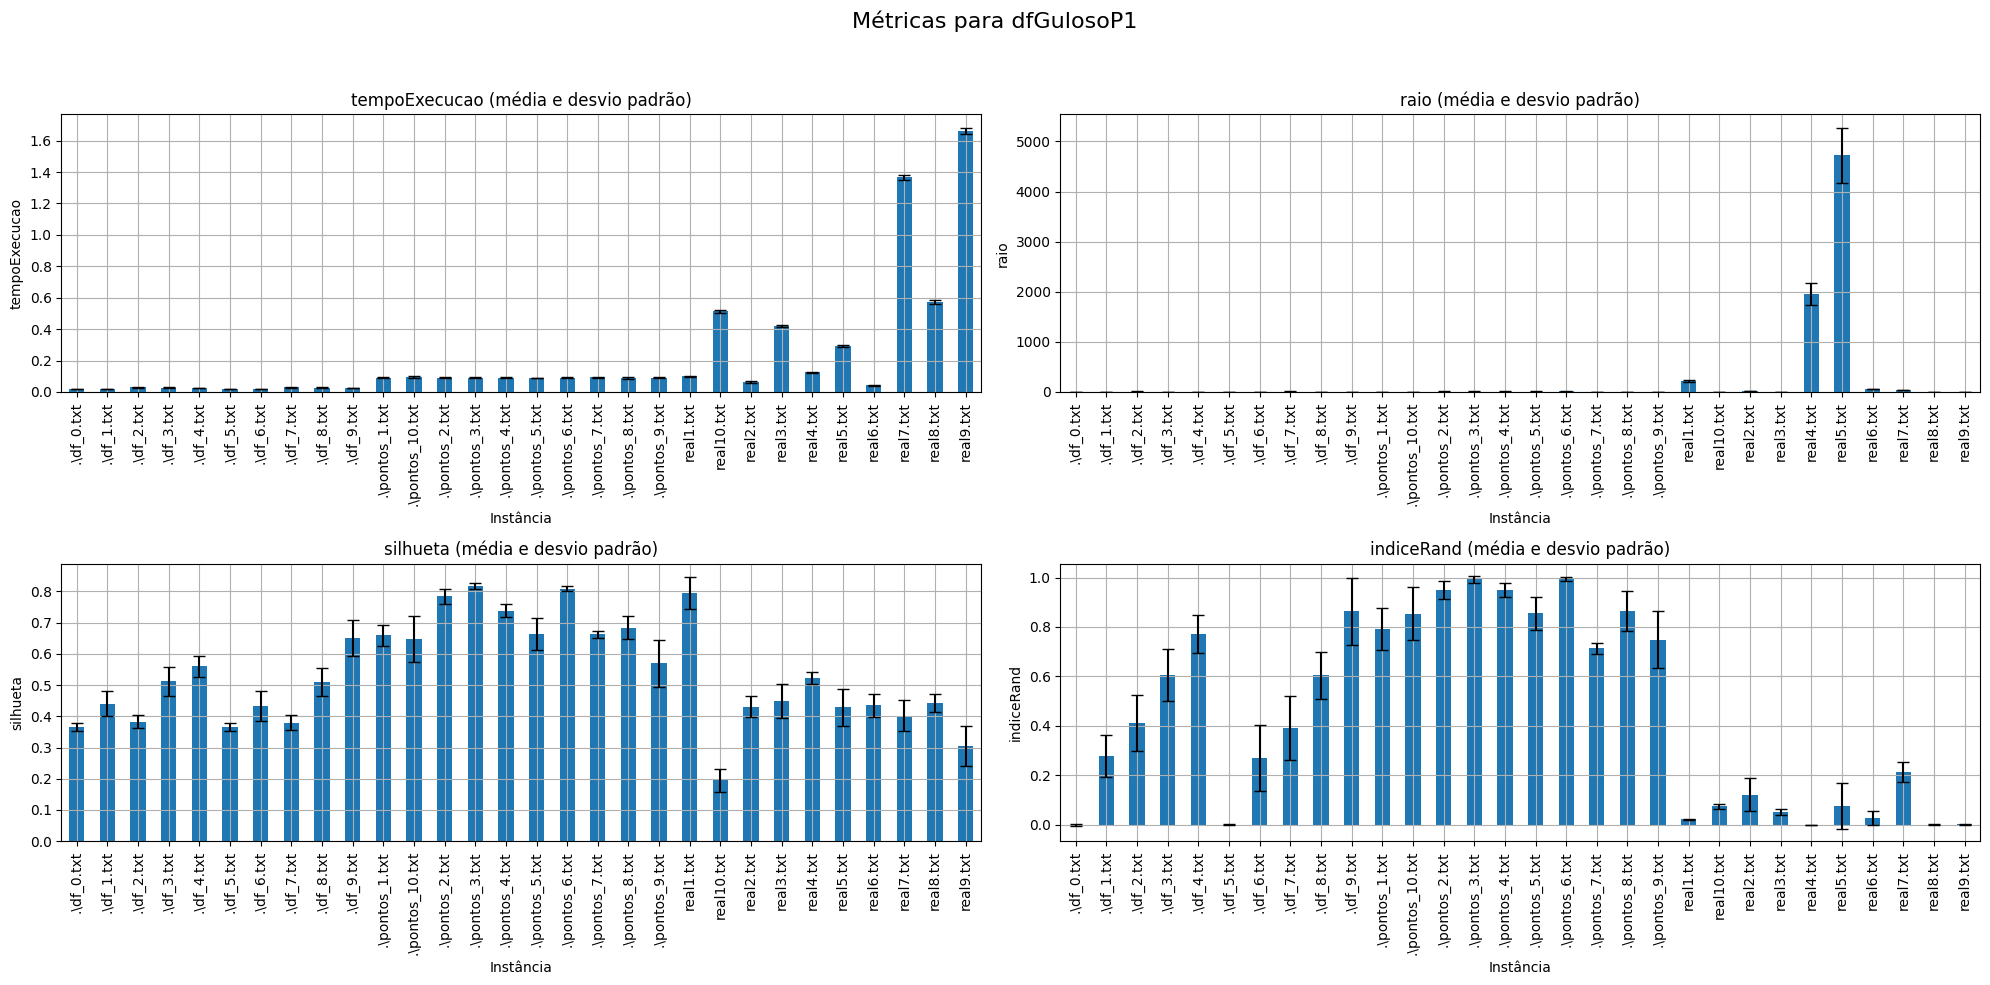

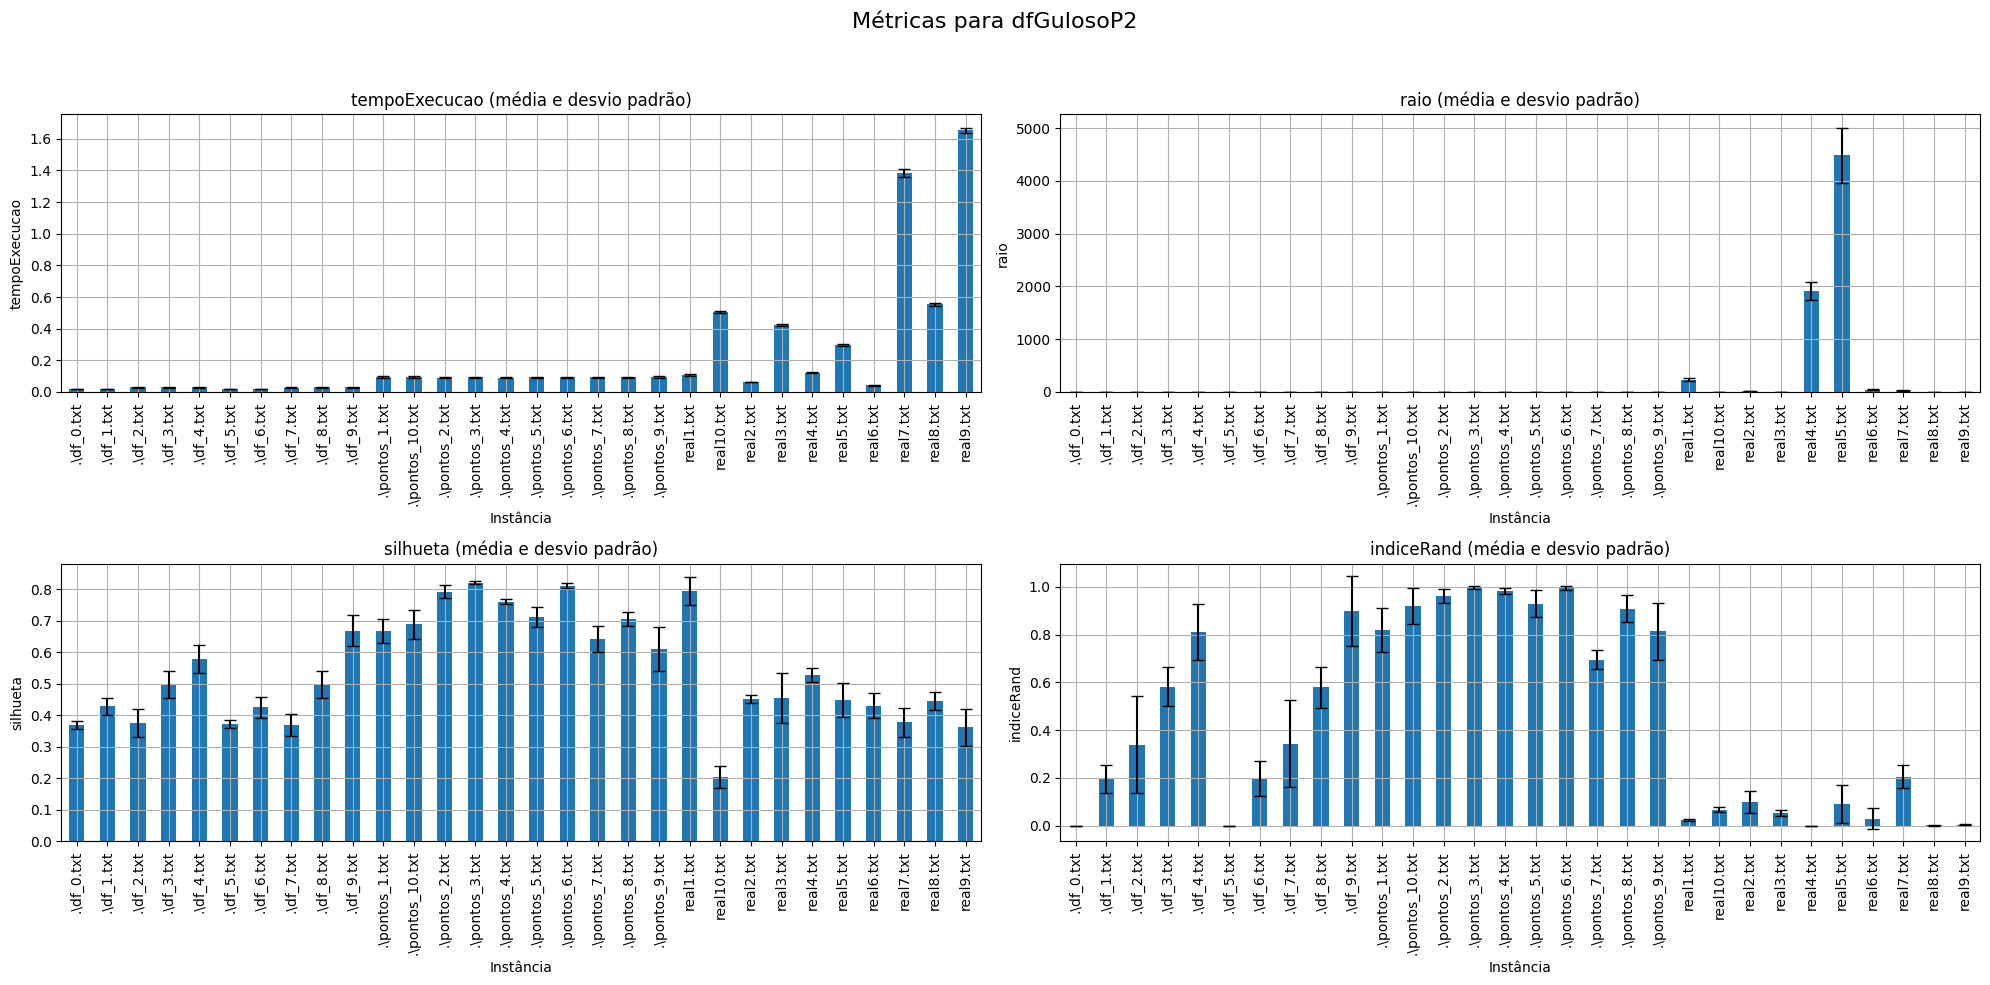

In [ ]:
# Função para gerar a visualização para um DataFrame agrupado
def plot_metrics(resultados, title):
    # Definindo as métricas que vamos visualizar
    metrics = ['tempoExecucao', 'raio', 'silhueta', 'indiceRand']

    # Preparando os subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    # Iterando sobre as métricas para gerar gráficos
    for i, metric in enumerate(metrics):
        ax = axs[i // 2, i % 2]

        # Extraindo os dados agrupados
        mean_values = resultados[metric]['mean']
        std_values = resultados[metric]['std']

        # Plotando o gráfico de barras com erro
        mean_values.plot(kind='bar', yerr=std_values, ax=ax, capsize=4)

        # Configurando o gráfico
        ax.set_title(f'{metric} (média e desvio padrão)')
        ax.set_xlabel('Instância')
        ax.set_ylabel(metric)
        ax.grid(True)

    # Ajustando o layout para evitar sobreposição
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Exibindo o gráfico
    plt.show()

# Visualização para dfGulosoP1
plot_metrics(resultadosGuloso1, "Métricas para dfGulosoP1")

# Visualização para dfGulosoP2
plot_metrics(resultadosGuloso2, "Métricas para dfGulosoP2")


            raio_mean    raio  raio_diff
instancia                               
.\df_0.txt   2.157497  1.3074   0.850097
.\df_1.txt   2.314687  1.2422   1.072487
.\df_2.txt   9.076587  6.5287   2.547887
.\df_3.txt   3.304883  2.1248   1.180083
.\df_4.txt   7.063367  3.6688   3.394567
            raio_mean    raio  raio_diff
instancia                               
.\df_0.txt   1.807010  1.3074   0.499610
.\df_1.txt   1.799467  1.2422   0.557267
.\df_2.txt   7.418263  6.5287   0.889563
.\df_3.txt   2.622930  2.1248   0.498130
.\df_4.txt   5.040793  3.6688   1.371993


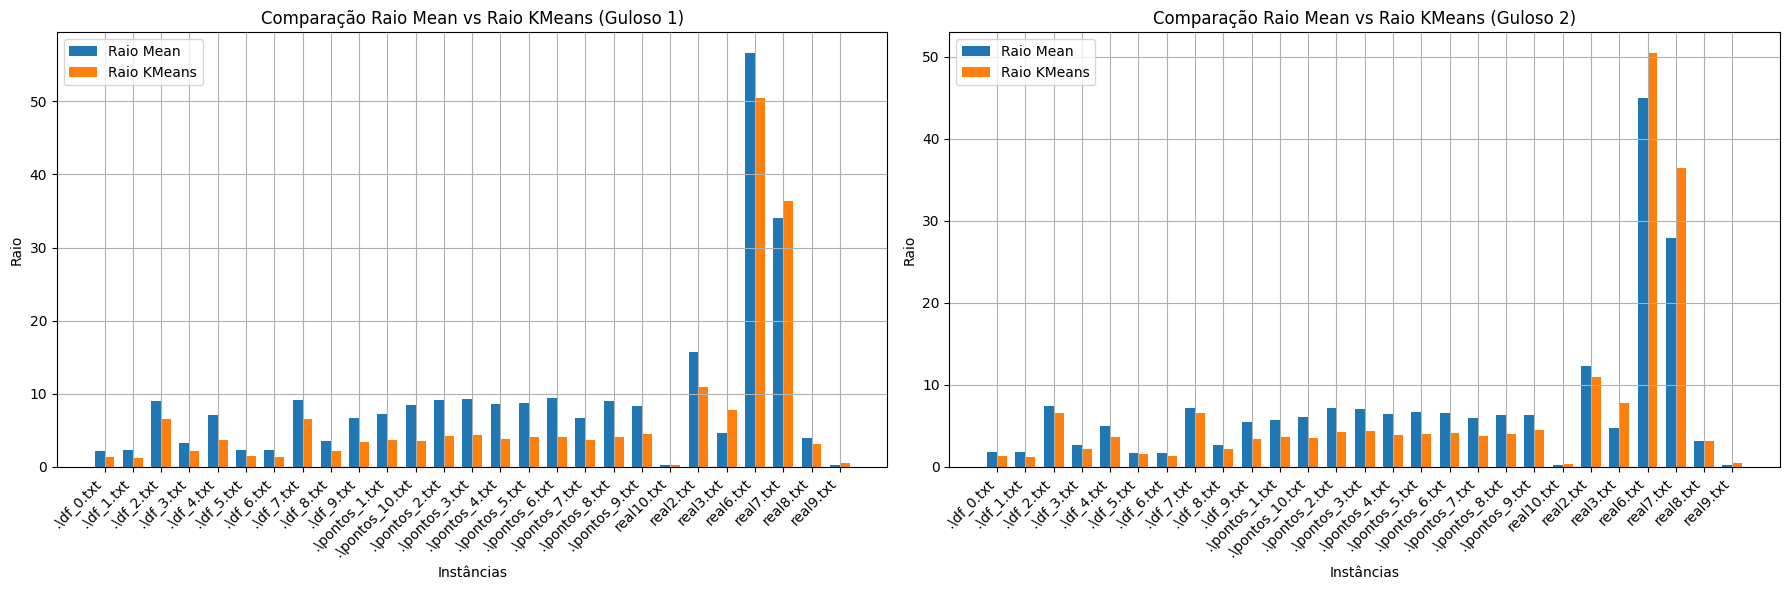

In [54]:
dfKMeans = df.query('algoritmo == 3')

# Lista de instâncias a serem removidas
instancias_remover = ['real1.txt', 'real4.txt', 'real5.txt']

# Removendo as instâncias do DataFrame
resultadosGuloso1 = resultadosGuloso1.drop(index=instancias_remover, errors='ignore')
resultadosGuloso2 = resultadosGuloso2.drop(index=instancias_remover, errors='ignore')

# Criando DataFrames com a coluna de média do raio
raio_mean_guloso1 = resultadosGuloso1[[('raio', 'mean')]].copy()
raio_mean_guloso2 = resultadosGuloso2[[('raio', 'mean')]].copy()

# Renomeando as colunas para facilitar o acesso (opcional)
raio_mean_guloso1.columns = ['raio_mean']
raio_mean_guloso2.columns = ['raio_mean']

# Garantindo que a coluna 'instancia' seja o índice de dfKMeans
dfKMeans = dfKMeans.set_index('instancia')

# Fazendo o join entre os DataFrames de raio_mean e dfKMeans baseado na coluna 'instancia'
raio_mean_guloso1 = raio_mean_guloso1.join(dfKMeans[['raio']], on='instancia', how='left', rsuffix='_KMeans')
raio_mean_guloso2 = raio_mean_guloso2.join(dfKMeans[['raio']], on='instancia', how='left', rsuffix='_KMeans')

# Calculando a subtração entre o raio de KMeans e o raio_mean para os dois DataFrames
raio_mean_guloso1['raio_diff'] = raio_mean_guloso1['raio_mean'] - raio_mean_guloso1['raio']
raio_mean_guloso2['raio_diff'] = raio_mean_guloso2['raio_mean'] - raio_mean_guloso2['raio']

# Exibindo os DataFrames resultantes com a nova coluna de diferença
print(raio_mean_guloso1.head())
print(raio_mean_guloso2.head())


# Preparando os subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Função para plotar barras agrupadas
def plot_comparison(df, ax, title):
    # Extraindo os valores de raio_mean e raio
    instances = df.index
    raio_mean = df['raio_mean']
    raio_kmeans = df['raio']

    # Definindo o espaçamento entre as barras
    bar_width = 0.35
    index = np.arange(len(instances))

    # Plotando as barras
    ax.bar(index, raio_mean, bar_width, label='Raio Mean')
    ax.bar(index + bar_width, raio_kmeans, bar_width, label='Raio KMeans')

    # Configurando o gráfico
    ax.set_xlabel('Instâncias')
    ax.set_ylabel('Raio')
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(instances, rotation=45, ha='right')
    ax.legend()
    ax.grid(True)

# Plotando para raio_mean_guloso1
plot_comparison(raio_mean_guloso1, axs[0], 'Comparação Raio Mean vs Raio KMeans (Guloso 1)')

# Plotando para raio_mean_guloso2
plot_comparison(raio_mean_guloso2, axs[1], 'Comparação Raio Mean vs Raio KMeans (Guloso 2)')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()


In [55]:
# Agrupando os dados por 'numCentros' e 'p' e calculando as estatísticas desejadas
dfAproxP1 = dfAproxRaio.query('p == 1')
dfAproxP2 = dfAproxRaio.query('p == 2')

dfAproxRaioRealP1 = dfAproxP1[dfAproxRaio['instancia'].str.contains('real')]
dfAproxRaioDfP1 = dfAproxP1[dfAproxRaio['instancia'].str.contains('df')]
dfAproxRaioPontosP1 = dfAproxP1[dfAproxRaio['instancia'].str.contains('pontos')]
dfAproxRaioRealP2 = dfAproxP1[dfAproxRaio['instancia'].str.contains('real')]
dfAproxRaioDfP2 = dfAproxP1[dfAproxRaio['instancia'].str.contains('df')]
dfAproxRaioPontosP2 = dfAproxP1[dfAproxRaio['instancia'].str.contains('pontos')]

resultadosAproxRaioRealP1 = dfAproxRaioRealP1.groupby(['instancia', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])
resultadosAproxRaioDfP1 = dfAproxRaioDfP1.groupby(['instancia', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])
resultadosAproxRaioPontosP1 = dfAproxRaioPontosP1.groupby(['instancia', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])

resultadosAproxRaioRealP2 = dfAproxRaioRealP1.groupby(['instancia', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])
resultadosAproxRaioDfP2 = dfAproxRaioDfP1.groupby(['instancia', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])
resultadosAproxRaioPontosP2 = dfAproxRaioPontosP1.groupby(['instancia', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])

resultadosAproxRaioPontosP2

<ipython-input-55-5a45c80ff9a3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfAproxRaioRealP1 = dfAproxP1[dfAproxRaio['instancia'].str.contains('real')]
<ipython-input-55-5a45c80ff9a3>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfAproxRaioDfP1 = dfAproxP1[dfAproxRaio['instancia'].str.contains('df')]
<ipython-input-55-5a45c80ff9a3>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfAproxRaioPontosP1 = dfAproxP1[dfAproxRaio['instancia'].str.contains('pontos')]
<ipython-input-55-5a45c80ff9a3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfAproxRaioRealP2 = dfAproxP1[dfAproxRaio['instancia'].str.contains('real')]
<ipython-input-55-5a45c80ff9a3>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfAproxRaioDfP2 = dfAproxP1[dfAproxRaio['instancia'].str.contains('df')]
<ipython-input-55-5a45c80ff9a3>:10: UserWarning: Boole

tempoExecucao                 raio            \
                                     mean       std       mean       std   
instancia       percentRaio                                                
.\pontos_1.txt  0.01             0.070837  0.012947  15.007090  5.870242   
                0.02             0.112397  0.010612  14.157843  6.478545   
                0.04             0.095003  0.005139  11.202110  5.205660   
                0.08             0.077737  0.003790   6.540077  0.784862   
                0.16             0.058983  0.001829   7.450020  0.834319   
.\pontos_10.txt 0.01             0.070637  0.013672  14.677357  6.733799   
                0.02             0.111980  0.004248  13.221763  5.659315   
                0.04             0.096243  0.006817  11.016770  5.386602   
                0.08             0.078877  0.003693   9.255253  5.785932   
                0.16             0.058010  0.005417   7.841053  0.920218   
.\pontos_2.txt  0.01             0.070083  0.012067  21.797380  7.503164   
                0.02             0.117963  0.009777  19.786077  6.984694   
                0.04             0.093837  0.003607  15.437997  6.876548   
                0.08             0.081447  0.005745   7.036867  0.882121   
                0.16             0.064653  0.003443   7.548473  1.475954   
.\pontos_3.txt  0.01             0.071017  0.012426  15.284730  2.236484   
                0.02             0.112847  0.004353  15.451363  3.918136   
                0.04             0.098327  0.005738  12.927420  2.998199   
                0.08             0.080547  0.004016   8.700803  2.417221   
                0.16             0.067043  0.002428   7.942670  1.042705   
.\pontos_4.txt  0.01             0.070303  0.011630  17.101210  7.897644   
                0.02             0.110143  0.003649  13.669677  3.117646   
                0.04             0.095983  0.007300  11.838470  3.662542   
                0.08             0.077863  0.002433   8.023950  2.086500   
                0.16             0.061040  0.005009   9.341527  1.765276   
.\pontos_5.txt  0.01             0.071143  0.011755  14.431597  2.974621   
                0.02             0.108220  0.003934  13.346713  5.414136   
                0.04             0.094273  0.007317  10.418330  4.554833   
                0.08             0.077157  0.004901   7.170860  0.917580   
                0.16             0.058937  0.004634   9.211343  1.270209   
.\pontos_6.txt  0.01             0.070933  0.012969  16.055670  3.181059   
                0.02             0.117077  0.003971  14.817517  2.741143   
                0.04             0.099813  0.004542  13.206883  3.199519   
                0.08             0.082997  0.003453   8.967793  3.314485   
                0.16             0.069820  0.002906   7.411543  0.873382   
.\pontos_7.txt  0.01             0.070843  0.010877  16.404560  7.450490   
                0.02             0.104313  0.003952  15.093057  8.222365   
                0.04             0.092483  0.004921   9.762487  6.110794   
                0.08             0.076060  0.007334   6.261677  0.609951   
                0.16             0.050910  0.002692  10.179520  1.244657   
.\pontos_8.txt  0.01             0.070923  0.013129  14.041137  4.705363   
                0.02             0.118370  0.005280  15.555943  4.594291   
                0.04             0.101593  0.004566  14.311617  4.703914   
                0.08             0.082053  0.005590   9.463033  3.902210   
                0.16             0.067997  0.006350   7.571033  0.852000   
.\pontos_9.txt  0.01             0.070913  0.012401  11.709867  4.491276   
                0.02             0.113193  0.005097  13.182997  3.484278   
                0.04             0.098497  0.006182  11.413150  3.026490   
                0.08             0.083893  0.006788   8.262210  2.523863   
                0.16             0.062513  0.005873   7.373953  0.880596   


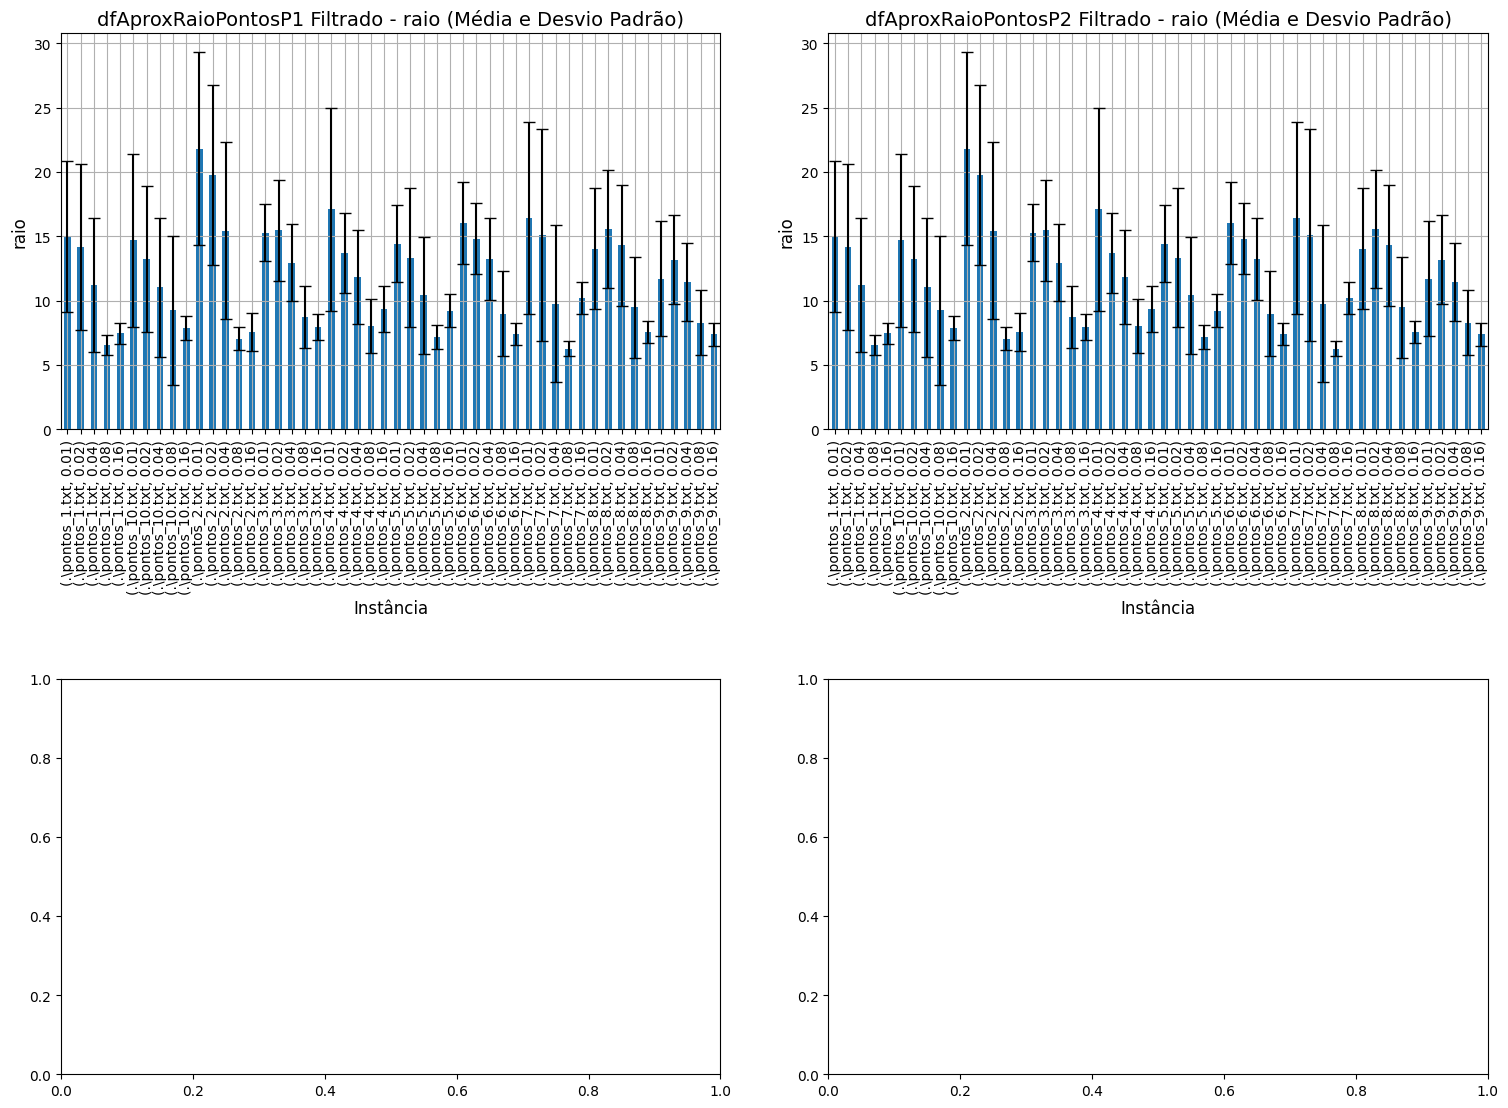

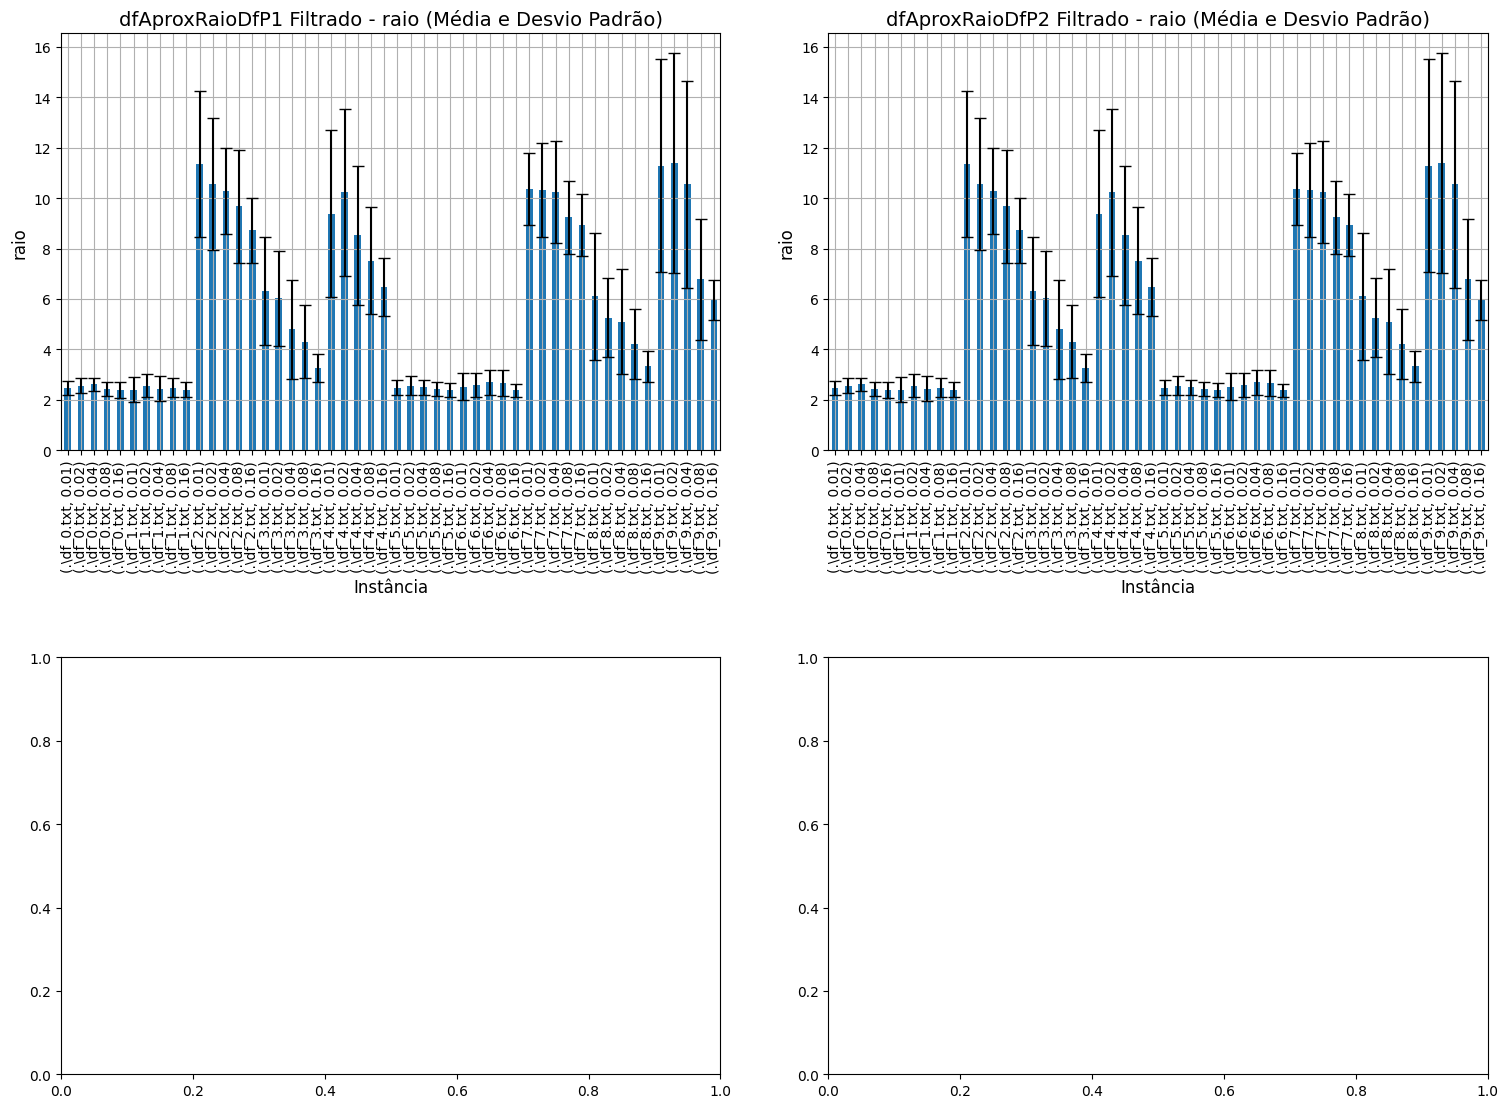

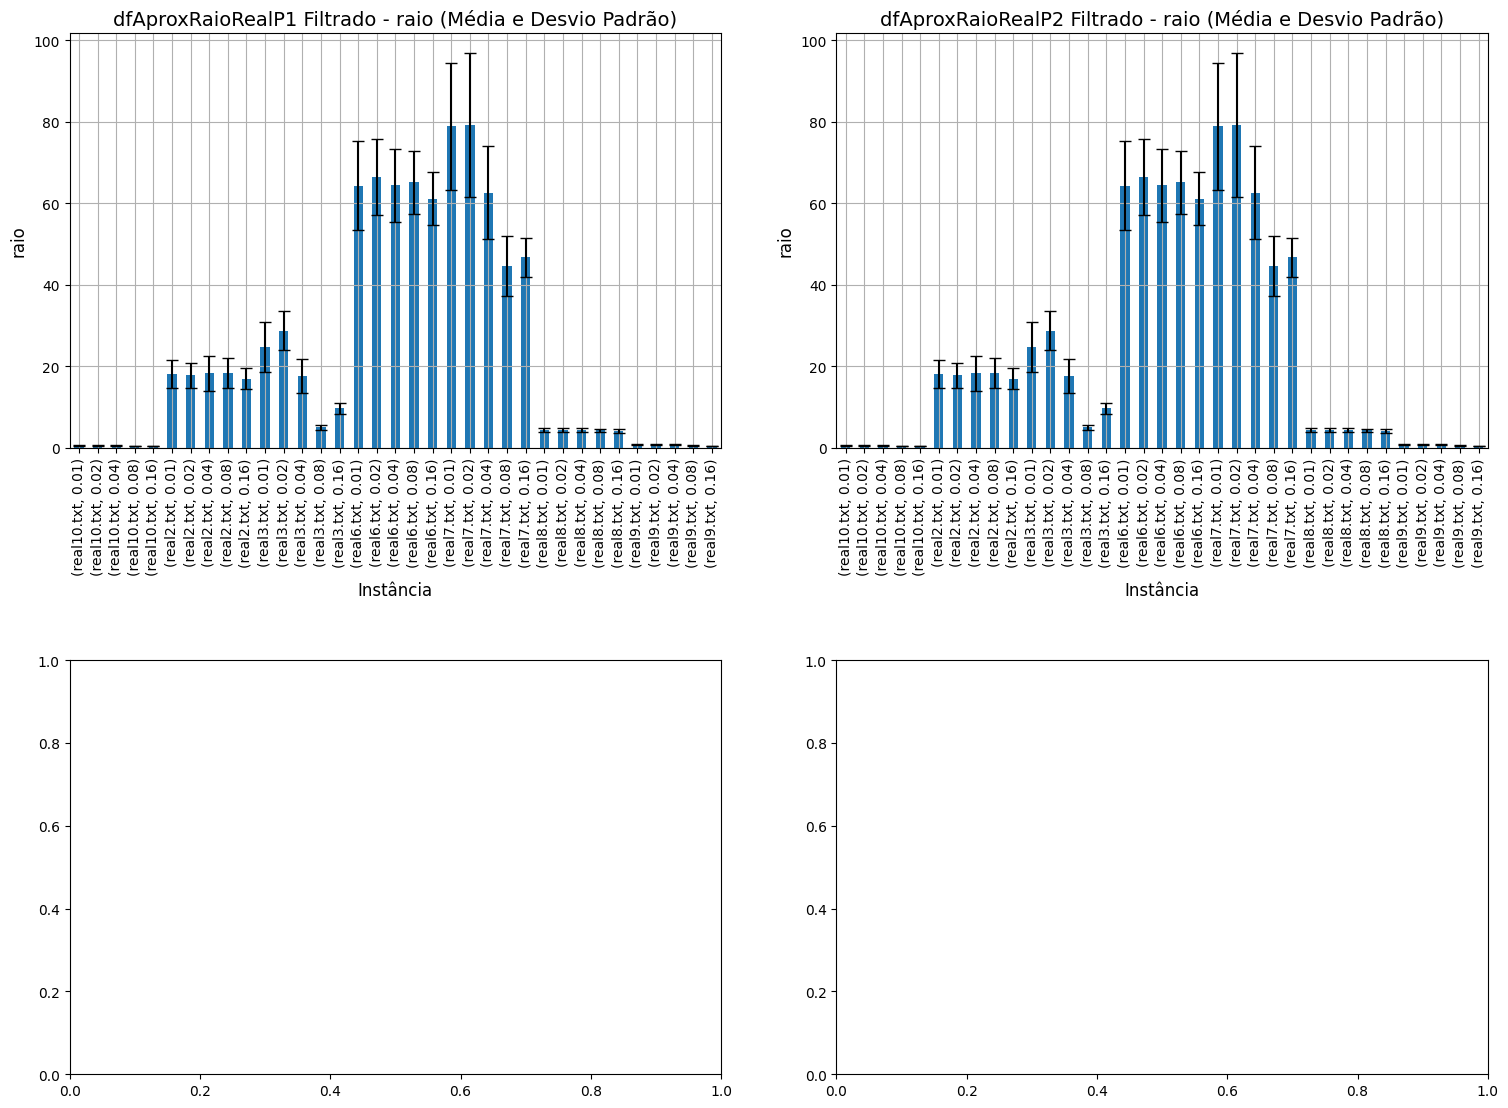

In [58]:
# Lista de instâncias a serem removidas
instancias_remover = ['real1.txt', 'real4.txt', 'real5.txt']

# Removendo as instâncias do DataFrame
resultadosAproxRaioPontosP1_filtered = resultadosAproxRaioPontosP1.drop(index=instancias_remover, errors='ignore')
resultadosAproxRaioDfP1_filtered = resultadosAproxRaioDfP1.drop(index=instancias_remover, errors='ignore')
resultadosAproxRaioRealP1_filtered = resultadosAproxRaioRealP1.drop(index=instancias_remover, errors='ignore')
resultadosAproxRaioPontosP2_filtered = resultadosAproxRaioPontosP2.drop(index=instancias_remover, errors='ignore')
resultadosAproxRaioDfP2_filtered = resultadosAproxRaioDfP2.drop(index=instancias_remover, errors='ignore')
resultadosAproxRaioRealP2_filtered = resultadosAproxRaioRealP2.drop(index=instancias_remover, errors='ignore')

# Função para visualizar os dados filtrados com gráficos maiores
def plot_filtered_metrics(resultados1, resultados2, title1, title2):
    metrics = ['raio']

    fig, axs = plt.subplots(2, 2, figsize=(16, 12))  # Aumentando o tamanho da figura

    # Plotando para resultados1
    for i, metric in enumerate(metrics):
        ax = axs[0, 0]  # Coluna 0, linha 0 para resultados1
        resultados1[metric]['mean'].plot(kind='bar', yerr=resultados1[metric]['std'], ax=ax, capsize=4)
        ax.set_title(f'{title1} - {metric} (Média e Desvio Padrão)', fontsize=14)
        ax.set_xlabel('Instância', fontsize=12)
        ax.set_ylabel(metric, fontsize=12)
        ax.grid(True)

    # Plotando para resultados2
    for i, metric in enumerate(metrics):
        ax = axs[0, 1]  # Coluna 1, linha 0 para resultados2
        resultados2[metric]['mean'].plot(kind='bar', yerr=resultados2[metric]['std'], ax=ax, capsize=4)
        ax.set_title(f'{title2} - {metric} (Média e Desvio Padrão)', fontsize=14)
        ax.set_xlabel('Instância', fontsize=12)
        ax.set_ylabel(metric, fontsize=12)
        ax.grid(True)

    # Ajustando o layout para maior espaçamento
    plt.tight_layout(pad=4)
    plt.show()

# Visualizando os resultados após remover as instâncias com gráficos maiores
plot_filtered_metrics(resultadosAproxRaioPontosP1_filtered, resultadosAproxRaioPontosP2_filtered, "dfAproxRaioPontosP1 Filtrado", "dfAproxRaioPontosP2 Filtrado")
plot_filtered_metrics(resultadosAproxRaioDfP1_filtered, resultadosAproxRaioDfP2_filtered, "dfAproxRaioDfP1 Filtrado", "dfAproxRaioDfP2 Filtrado")
plot_filtered_metrics(resultadosAproxRaioRealP1_filtered, resultadosAproxRaioRealP2_filtered, "dfAproxRaioRealP1 Filtrado", "dfAproxRaioRealP2 Filtrado")



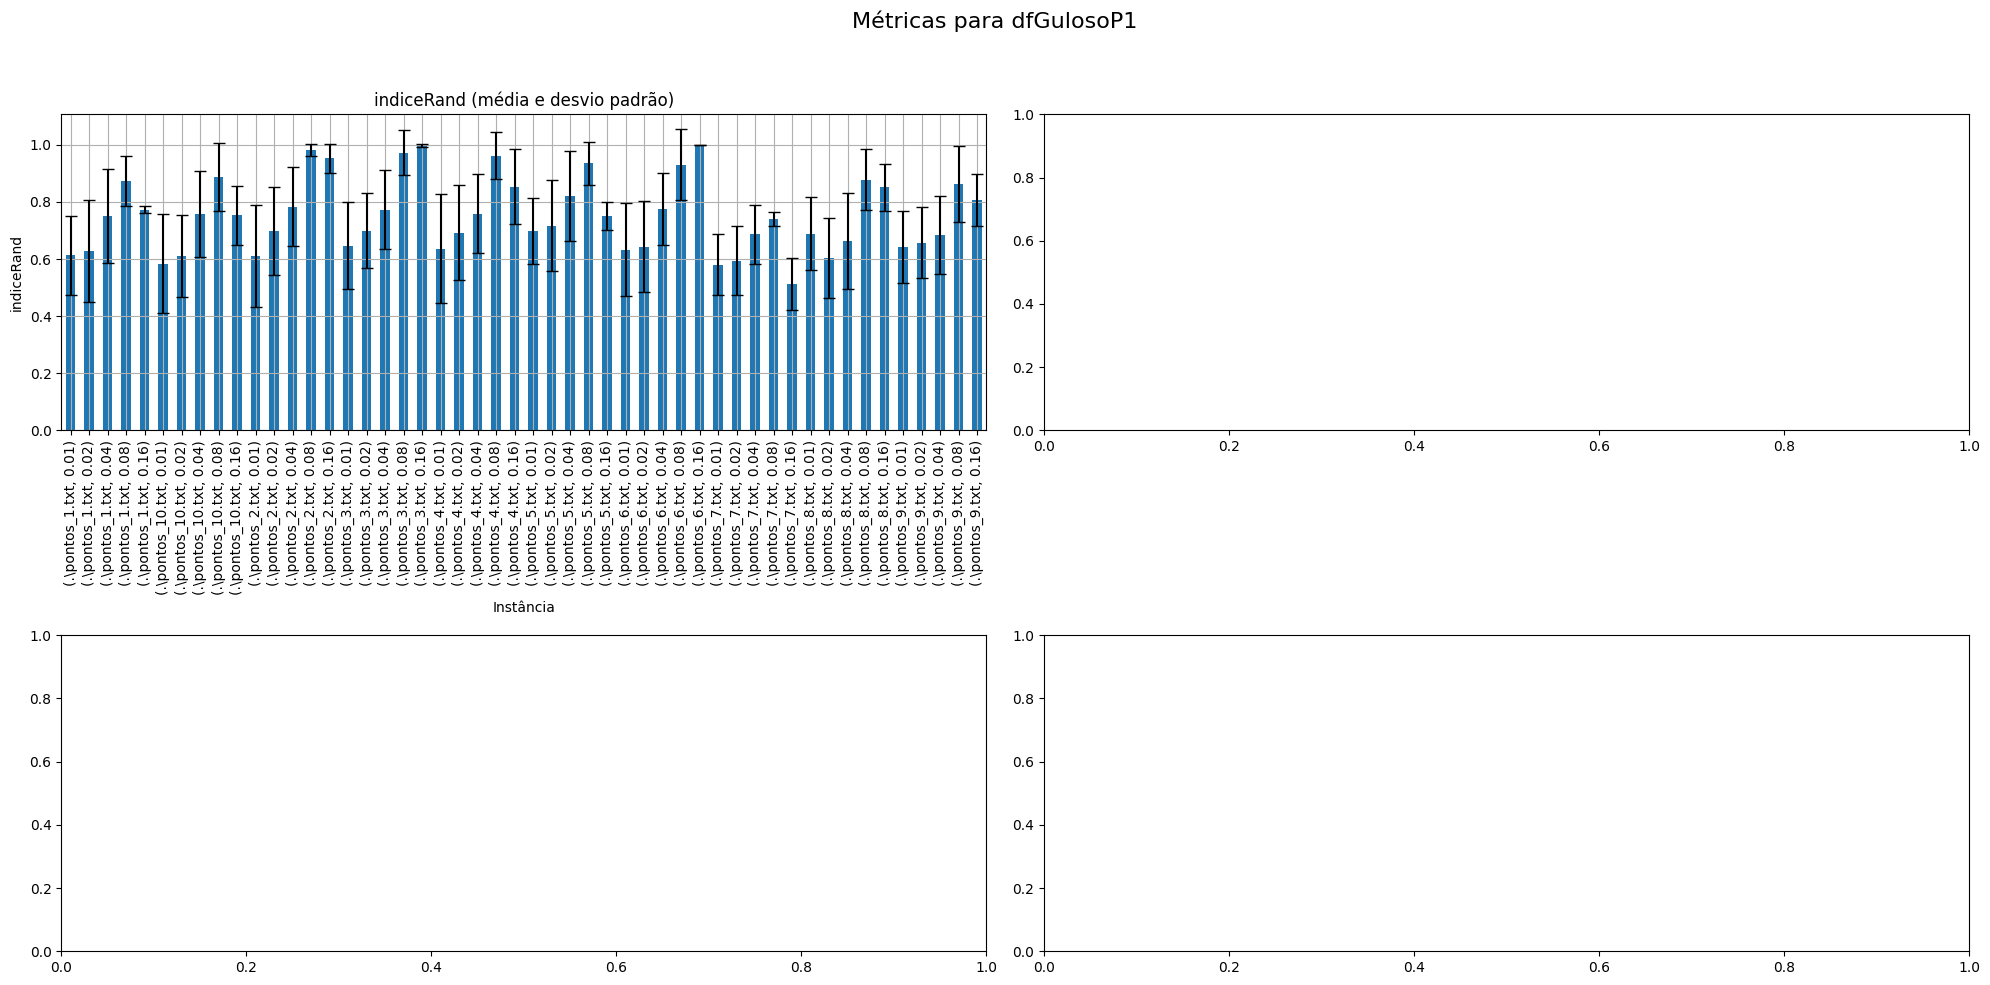

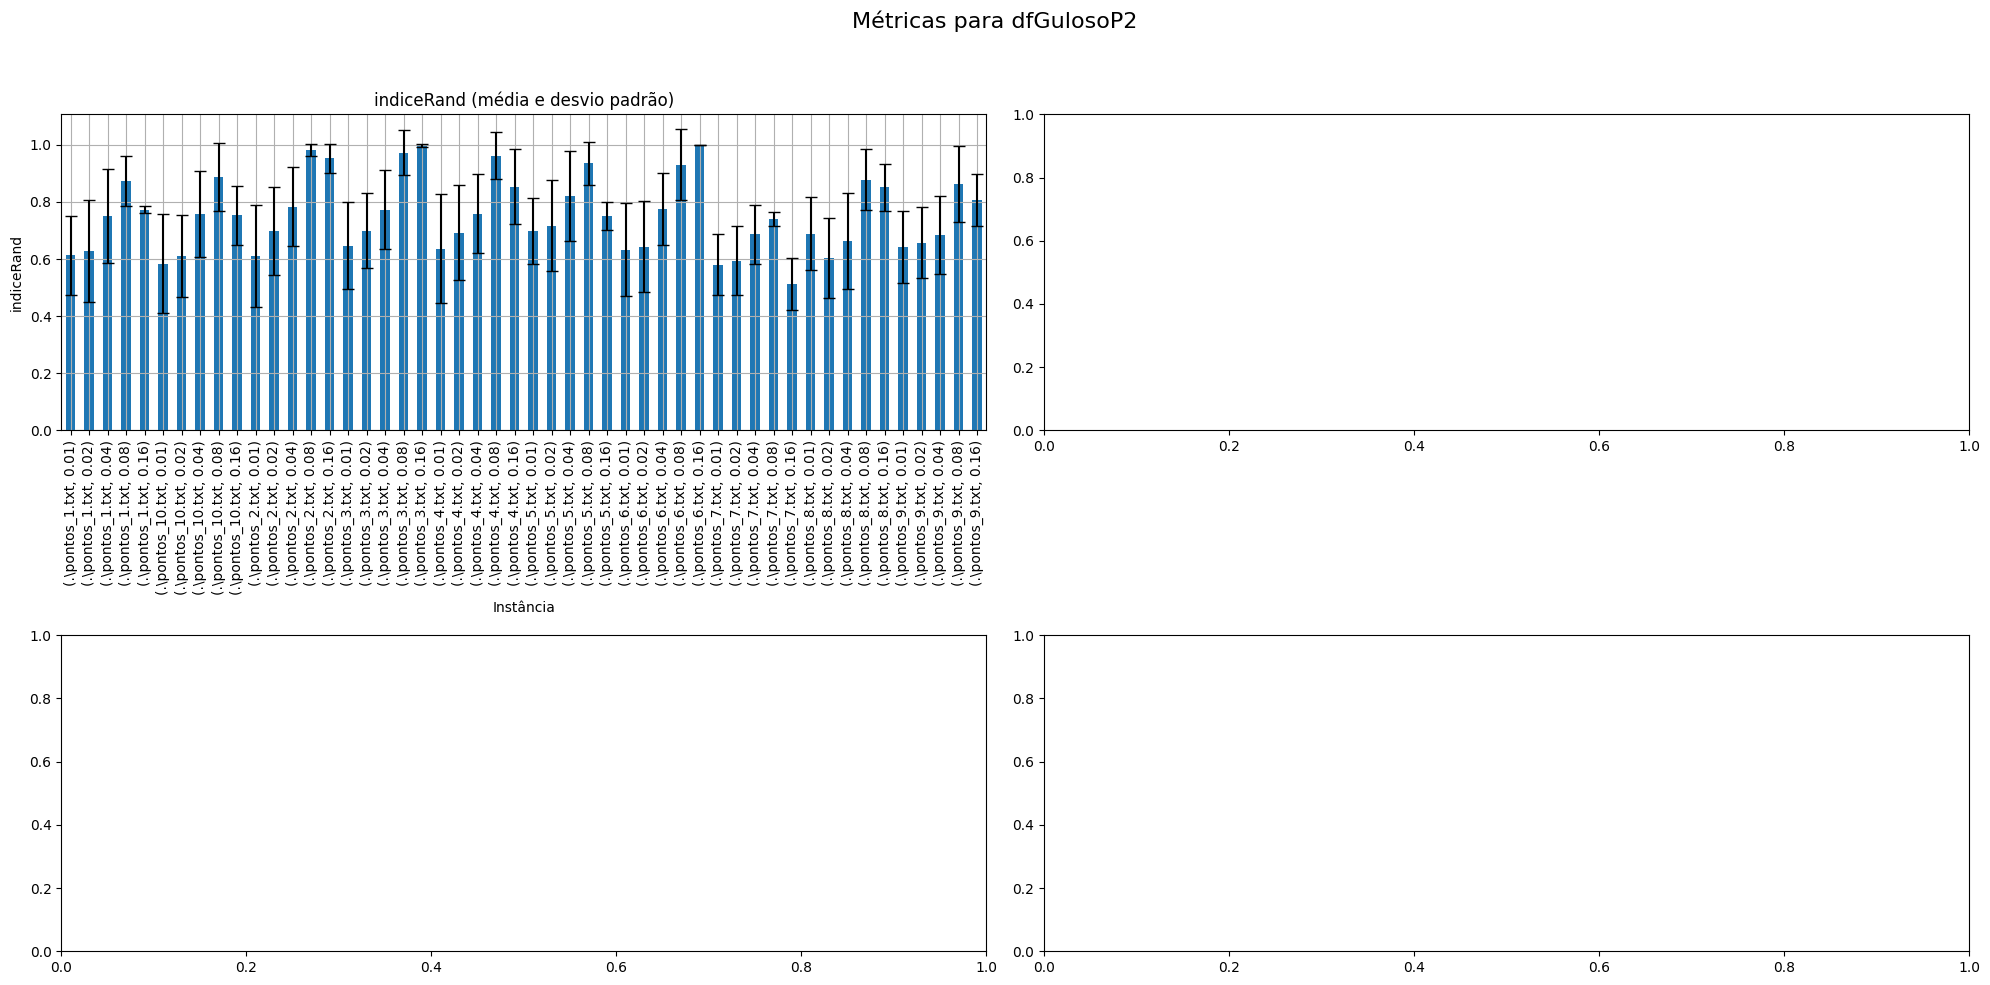

In [59]:
# Função para gerar a visualização para um DataFrame agrupado
def plot_metrics(resultados, title):
    # Definindo as métricas que vamos visualizar
    metrics = ['indiceRand']

    # Preparando os subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    # Iterando sobre as métricas para gerar gráficos
    for i, metric in enumerate(metrics):
        ax = axs[i // 2, i % 2]

        # Extraindo os dados agrupados
        mean_values = resultados[metric]['mean']
        std_values = resultados[metric]['std']

        # Plotando o gráfico de barras com erro
        mean_values.plot(kind='bar', yerr=std_values, ax=ax, capsize=4)

        # Configurando o gráfico
        ax.set_title(f'{metric} (média e desvio padrão)')
        ax.set_xlabel('Instância')
        ax.set_ylabel(metric)
        ax.grid(True)

    # Ajustando o layout para evitar sobreposição
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Exibindo o gráfico
    plt.show()

# Visualização para dfGulosoP1
plot_metrics(resultadosAproxRaioPontosP1, "Métricas para dfGulosoP1")

# Visualização para dfGulosoP2
plot_metrics(resultadosAproxRaioPontosP2, "Métricas para dfGulosoP2")

# resultadosAproxRaioRealP1 = dfAproxRaioRealP1.groupby(['instancia', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])
# resultadosAproxRaioDfP1 = dfAproxRaioDfP1.groupby(['instancia', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])
# resultadosAproxRaioPontosP1 = dfAproxRaioPontosP1.groupby(['instancia', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])

# resultadosAproxRaioRealP2 = dfAproxRaioRealP1.groupby(['instancia', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])
# resultadosAproxRaioDfP2 = dfAproxRaioDfP1.groupby(['instancia', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])
# resultadosAproxRaioPontosP2 = dfAproxRaioPontosP1.groupby(['instancia', 'percentRaio'])[['tempoExecucao', 'raio', 'silhueta', 'indiceRand']].agg(['mean', 'std'])

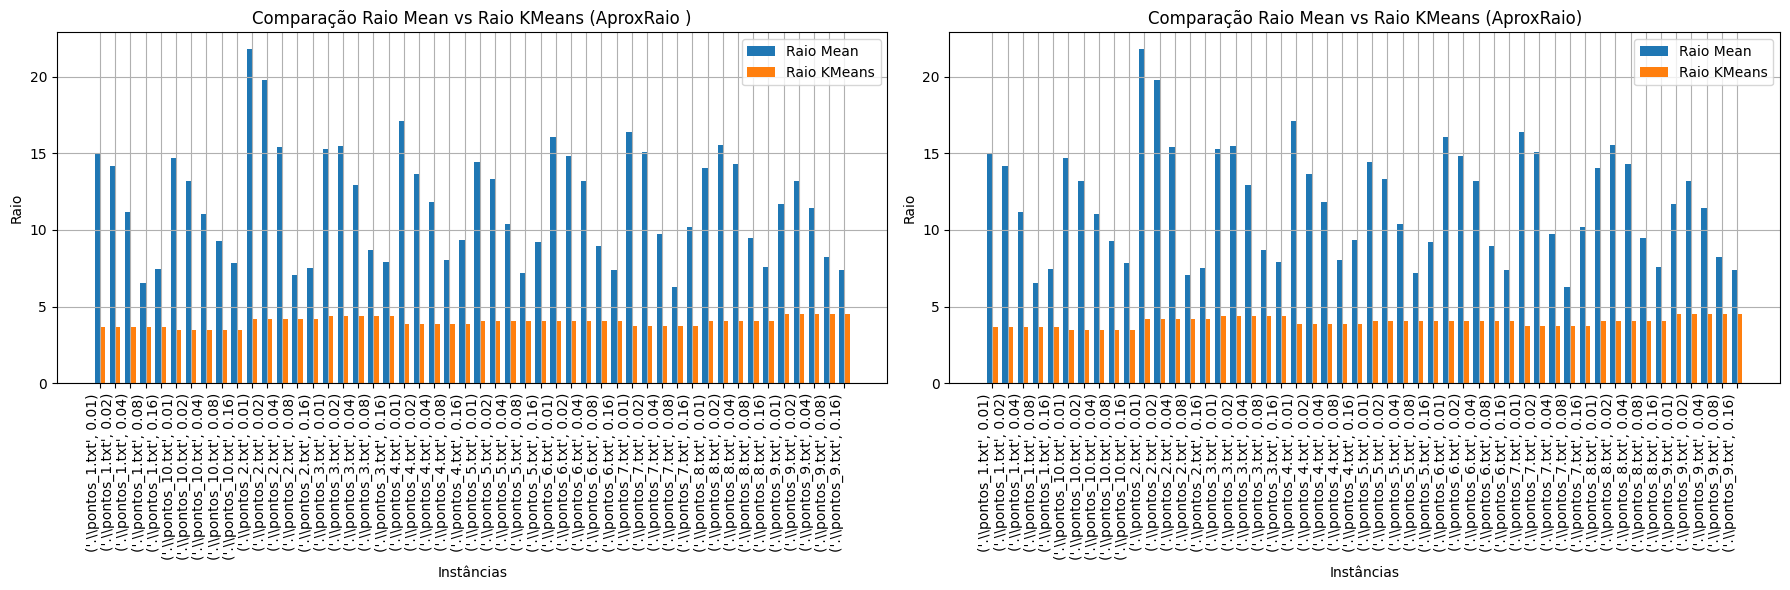

In [64]:
dfKMeans = df.query('algoritmo == 3')

# Lista de instâncias a serem removidas
instancias_remover = ['real1.txt', 'real4.txt', 'real5.txt']

# Removendo as instâncias do DataFrame
resultadosAproxRaioPontosP1_filtered = resultadosAproxRaioPontosP1.drop(index=instancias_remover, errors='ignore')
resultadosAproxRaioDfP1_filtered = resultadosAproxRaioDfP1.drop(index=instancias_remover, errors='ignore')
resultadosAproxRaioRealP1_filtered = resultadosAproxRaioRealP1.drop(index=instancias_remover, errors='ignore')
resultadosAproxRaioPontosP2_filtered = resultadosAproxRaioPontosP2.drop(index=instancias_remover, errors='ignore')
resultadosAproxRaioDfP2_filtered = resultadosAproxRaioDfP2.drop(index=instancias_remover, errors='ignore')
resultadosAproxRaioRealP2_filtered = resultadosAproxRaioRealP2.drop(index=instancias_remover, errors='ignore')

# Criando DataFrames com a coluna de média do raio
raio_mean_guloso1 = resultadosGuloso1[[('raio', 'mean')]].copy()
raio_mean_guloso2 = resultadosGuloso2[[('raio', 'mean')]].copy()
raio_AproxRaioPontosP1_filtered = resultadosAproxRaioPontosP1_filtered[[('raio', 'mean')]].copy()
raio_AproxRaioDfP1_filtered = resultadosAproxRaioDfP1_filtered[[('raio', 'mean')]].copy()
raio_AproxRaioRealP1_filtered = resultadosAproxRaioRealP1_filtered[[('raio', 'mean')]].copy()
raio_AproxRaioPontosP2_filtered = resultadosAproxRaioPontosP2_filtered[[('raio', 'mean')]].copy()
raio_AproxRaioDfP2_filtered = resultadosAproxRaioDfP2[[('raio', 'mean')]].copy()
raio_AproxRaioRealP2_filtered = resultadosAproxRaioRealP2[[('raio', 'mean')]].copy()

# Renomeando as colunas para facilitar o acesso (opcional)
raio_mean_guloso1.columns = ['raio_mean']
raio_mean_guloso2.columns = ['raio_mean']
raio_AproxRaioPontosP1_filtered.columns = ['raio_mean']
raio_AproxRaioDfP1_filtered.columns = ['raio_mean']
raio_AproxRaioRealP1_filtered.columns = ['raio_mean']
raio_AproxRaioPontosP2_filtered.columns = ['raio_mean']
raio_AproxRaioDfP2_filtered.columns = ['raio_mean']
raio_AproxRaioRealP2_filtered.columns = ['raio_mean']

# Garantindo que a coluna 'instancia' seja o índice de dfKMeans
dfKMeans = dfKMeans.set_index('instancia')

# Fazendo o join entre os DataFrames de raio_mean e dfKMeans baseado na coluna 'instancia'
raio_mean_guloso1 = raio_mean_guloso1.join(dfKMeans[['raio']], on='instancia', how='left', rsuffix='_KMeans')
raio_mean_guloso2 = raio_mean_guloso2.join(dfKMeans[['raio']], on='instancia', how='left', rsuffix='_KMeans')
raio_AproxRaioPontosP1_filtered = raio_AproxRaioPontosP1_filtered.join(dfKMeans[['raio']], on='instancia', how='left', rsuffix='_KMeans')
raio_AproxRaioDfP1_filtered = raio_AproxRaioDfP1_filtered.join(dfKMeans[['raio']], on='instancia', how='left', rsuffix='_KMeans')
raio_AproxRaioRealP1_filtered = raio_AproxRaioRealP1_filtered.join(dfKMeans[['raio']], on='instancia', how='left', rsuffix='_KMeans')
raio_AproxRaioPontosP2_filtered = raio_AproxRaioPontosP2_filtered.join(dfKMeans[['raio']], on='instancia', how='left', rsuffix='_KMeans')
raio_AproxRaioDfP2_filtered = raio_AproxRaioDfP2_filtered.join(dfKMeans[['raio']], on='instancia', how='left', rsuffix='_KMeans')
raio_AproxRaioRealP2_filtered = raio_AproxRaioRealP2_filtered.join(dfKMeans[['raio']], on='instancia', how='left', rsuffix='_KMeans')


# Calculando a subtração entre o raio de KMeans e o raio_mean para os dois DataFrames
raio_mean_guloso1['raio_diff'] = raio_mean_guloso1['raio_mean'] - raio_mean_guloso1['raio']
raio_mean_guloso2['raio_diff'] = raio_mean_guloso2['raio_mean'] - raio_mean_guloso2['raio']
raio_AproxRaioPontosP1_filtered['raio_diff'] = raio_AproxRaioPontosP1_filtered['raio_mean'] - raio_AproxRaioPontosP1_filtered['raio']
raio_AproxRaioDfP1_filtered['raio_diff'] = raio_AproxRaioDfP1_filtered['raio_mean'] - raio_AproxRaioDfP1_filtered['raio']
raio_AproxRaioRealP1_filtered['raio_diff'] = raio_AproxRaioRealP1_filtered['raio_mean'] - raio_AproxRaioRealP1_filtered['raio']
raio_AproxRaioPontosP2_filtered['raio_diff'] = raio_AproxRaioPontosP2_filtered['raio_mean'] - raio_AproxRaioPontosP2_filtered['raio']
raio_AproxRaioDfP2_filtered['raio_diff'] = raio_AproxRaioDfP2_filtered['raio_mean'] - raio_AproxRaioDfP2_filtered['raio']
raio_AproxRaioRealP2_filtered['raio_diff'] = raio_AproxRaioRealP2_filtered['raio_mean'] - raio_AproxRaioRealP2_filtered['raio']

# Exibindo os DataFrames resultantes com a nova coluna de diferença
# print(raio_mean_guloso1.head())
# print(raio_mean_guloso2.head())


# Preparando os subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Função para plotar barras agrupadas
def plot_comparison(df, ax, title):
    # Extraindo os valores de raio_mean e raio
    instances = df.index
    raio_mean = df['raio_mean']
    raio_kmeans = df['raio']

    # Definindo o espaçamento entre as barras
    bar_width = 0.35
    index = np.arange(len(instances))

    # Plotando as barras
    ax.bar(index, raio_mean, bar_width, label='Raio Mean')
    ax.bar(index + bar_width, raio_kmeans, bar_width, label='Raio KMeans')

    # Configurando o gráfico
    ax.set_xlabel('Instâncias')
    ax.set_ylabel('Raio')
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(instances, rotation=90, ha='right')
    ax.legend()
    ax.grid(True)

# Plotando para raio_mean_guloso1
# plot_comparison(raio_mean_guloso1, axs[0], 'Comparação Raio Mean vs Raio KMeans (Guloso 1)')

# # Plotando para raio_mean_guloso2
# plot_comparison(raio_mean_guloso2, axs[1], 'Comparação Raio Mean vs Raio KMeans (Guloso 2)')
plot_comparison(raio_AproxRaioPontosP1_filtered, axs[0], 'Comparação Raio Mean vs Raio KMeans (AproxRaio )')

# Plotando para raio_mean_guloso2
plot_comparison(raio_AproxRaioPontosP2_filtered, axs[1], 'Comparação Raio Mean vs Raio KMeans (AproxRaio)')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()
